# Drug Overdose Rates and Contributing Factors

## Team Members: 
- Amy Dos Santos
- Brian Hester
- Kiley Karecki
- Morgan Bee
- Rowan Clark

## Introduction
Which factors, if any, are correlated with death by drug overdose in the United States? In this analysis, we will be examining deaths by drug overdose and various potential contributing factors. The data examined includes information from the years 2021-2023 in the United States, for individuals 18 and older. The various contributing factors analyzed are High School Graduation Rate, Median Household Income, and Unemployment Rate, all of which are calculated averages from 2021-2023. 

## Data Sources: 
### Please refer to folder **INSERT FOLDER HERE** to view all data cleaning. Please refer to folder "Resources" to view the final datasets used to merge in this notebook. 

- Drug Overdose Information from CDC API: 
    - Base Url: https://data.cdc.gov/resource/gb4e-yj24.json

- Drug Overdose by State: 
    - https://data.cdc.gov/NCHS/VSRR-Provisional-Drug-Overdose-Death-Counts/xkb8-kh2a/data_preview 

- High School Graduation Rate by State:
    - https://data.census.gov/table?q=graduation%20rates%20by%20state 

- Household Incomes by State:
    - https://data.census.gov/table/ACSST1Y2023.S1901?q=socioeconomic%20status%20by%20state 

- Unemployment Rate by County: 
    - https://data.census.gov/table/ACSDP5Y2022.DP03?q=unemployment&t=Employment:Health:Health%20Insurance:Income%20and%20Poverty&g=010XX00US$0500000,$0600000,$5000000_020XX00US1,2,3,4 

- Geographic centers of 50 US States (from GitHub user claraj): 
    - https://gist.github.com/claraj/3880cd48b3d8cb3a7f900aeb30b18fdd



## Hypotheses for this Analysis
In this analysis, we will be using a confidence level of 0.05 for each of the following Hypothesis pairs. 
- Education Rate and Drug Overdose Rate: 
    - Null Hypthesis: 
        - For adults 18 and older in the United States from the years 2021-2023, as average Education Rate increases, average Drug Overdose Rate does not change. 
    - Alternative Hypothesis: 
        - For adults 18 and older in the United States from the years 2021-2023, as average Education Rate increases, average Drug Overdose Rate decreases significantly. 
- Median Household Income and Drug Overdose Rate: 
    - Null Hypothesis: 
        - For adults 18 and older in the United States from the years 2021-2023, as average Median Household Income increases, average Drug Overdose Rate does not change. 
    - Alternative Hypothesis: 
        - For adults 18 and older in the United States from the years 2021-2023, as average Median Household Income increases, average Drug Overdose Rate decreases significantly.  
- Unemployment Rate and Drug Overdose Rate: 
    - Null Hypothesis: 
        - For adults 18 and older in the United States from the years 2021-2023, as average Unemployment Rate increases, average Drug Overdose Rate does not change. 
    - Alternative Hypothesis: 
        - For adults 18 and older in the United States from the years 2021-2023, as average Unemployment Rate increases, average Drug Overdose Rate also increases significantly.  


In [2]:
# Import modules
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
import hvplot.pandas
import pandas as pd
from pathlib import Path


In [3]:
# Read HS Grad Rate, Median Household Income, Unemployment Rate, and Drug Overdose Rates as CSV files into DataFrames
# Note that these datasets have already been cleaned in separate Notebooks in our Repository. 
# Refer to these folders: **INSERT FOLDERS HERE** to view raw data and cleaning process.
#import HS grad data & create dataframe
hs_grad_data = Path("Resources/Average_HS_Grad_Rates.csv")
hs_grad_df = pd.read_csv(hs_grad_data)
#import median income data & create dataframe
income_data = Path("Median Household Income.csv")
income_df = pd.read_csv(income_data)
#import unemployment data & create dataframe
unemployment_data = Path("unemployment_rate_by_state_2021_2023.csv")
unemployment_df = pd.read_csv(unemployment_data)
#import overdose data & create dataframe
overdose_data = Path ("average_deaths_df.csv")
overdose_df = pd.read_csv(overdose_data)
#import state geographic data & create dataframe
state_geo_data = Path("Resources/state_lat_lon.csv")
state_geo_df = pd.read_csv(state_geo_data)
state_geo_df.head()


,Unnamed: 0,State name,lat,lon,correct lon
0,0,Alabama,32.7794,-86.8287,86.8287
1,1,Alaska,64.0685,-152.2782,152.2782
2,2,Arizona,34.2744,-111.6602,111.6602
3,3,Arkansas,34.8938,-92.4426,92.4426
4,4,California,37.1841,-119.4696,119.4696


In [4]:
### clean dataframes to only include necessary columns
#HS graduation rates cleaned df
hs_grad_final_df = hs_grad_df[["State name", "Average High School Graduation Rate (2021-2023)", "Average Population (2021-2023)"]]
#unemployment rates cleaned df
unemployment_final_df = unemployment_df[["State name", "21-23 Avg Unemp Rate"]]
#overdose rates cleaned df
overdose_final_df = overdose_df[["State Name", "Average Deaths by OD"]]
overdoses_final_df = overdose_final_df.rename(columns={"State Name":"State name"})
#states geographical data rates cleaned df
state_geo_final_df = state_geo_df[["State name", "lat", "correct lon"]]
states_geo_final_df = state_geo_final_df.rename(columns={"lat":"Latitude", "correct lon":"Longitude"})


In [5]:
# Merge overdose and states geographic DataFrame on "State name"
overdose_states_geo_df = overdoses_final_df.merge(states_geo_final_df, how="inner", on="State name")
overdose_states_geo_df.head()

,State name,Average Deaths by OD,Latitude,Longitude
0,Alabama,1461.000000,32.7794,86.8287
1,Alaska,286.333333,64.0685,152.2782
2,Arizona,2745.666667,34.2744,111.6602
3,Arkansas,578.333333,34.8938,92.4426
4,California,11842.000000,37.1841,119.4696


In [6]:
# Merge overdose, states geographic data with HS grad data on "State name"
overdose_geo_HS_df = overdose_states_geo_df.merge(hs_grad_final_df, how="inner", on="State name")

overdose_geo_HS_df["Average rate of Deaths by OD"] = round((overdose_geo_HS_df["Average Deaths by OD"] / overdose_geo_HS_df['Average Population (2021-2023)']) * 100,4)

overdose_geo_HS_df.head()

,State name,Average Deaths by OD,Latitude,Longitude,Average High School Graduation Rate (2021-2023),Average Population (2021-2023),Average rate of Deaths by OD
0,Alabama,1461.000000,32.7794,86.8287,88.08,3954008,0.0369
1,Alaska,286.333333,64.0685,152.2782,92.60,556716,0.0514
2,Arizona,2745.666667,34.2744,111.6602,88.60,5761630,0.0477
3,Arkansas,578.333333,34.8938,92.4426,88.74,2346215,0.0246
4,California,11842.000000,37.1841,119.4696,85.24,30508752,0.0388


In [7]:
# Merge overdose, state geographic data, HS graduation, with unemployment data on "State name"
overdose_geo_HS_unemp_df = overdose_geo_HS_df.merge(unemployment_final_df, how="inner", on="State name")
overdose_geo_HS_unemp_df.head()

,State name,Average Deaths by OD,Latitude,Longitude,Average High School Graduation Rate (2021-2023),Average Population (2021-2023),Average rate of Deaths by OD,21-23 Avg Unemp Rate
0,Alabama,1461.000000,32.7794,86.8287,88.08,3954008,0.0369,2.638538
1,Alaska,286.333333,64.0685,152.2782,92.60,556716,0.0514,2.299195
2,Arizona,2745.666667,34.2744,111.6602,88.60,5761630,0.0477,3.912461
3,Arkansas,578.333333,34.8938,92.4426,88.74,2346215,0.0246,2.876260
4,California,11842.000000,37.1841,119.4696,85.24,30508752,0.0388,2.740597


In [8]:
# Merge overdose, state geographic data, HS graduation, unemployment data with median income on "State name"
deaths_by_OD_factors_df = overdose_geo_HS_unemp_df.merge(income_df,how="inner",on="State name")

deaths_by_OD_factors_df.head()

,State name,Average Deaths by OD,Latitude,Longitude,Average High School Graduation Rate (2021-2023),Average Population (2021-2023),Average rate of Deaths by OD,21-23 Avg Unemp Rate,2021 Median Household Income,2022 Median Household Income,2023 Median Household Income,Average
0,Alabama,1461.000000,32.7794,86.8287,88.08,3954008,0.0369,2.638538,53913,59674,62212,58599.666667
1,Alaska,286.333333,64.0685,152.2782,92.60,556716,0.0514,2.299195,77845,88121,86631,84199.000000
2,Arizona,2745.666667,34.2744,111.6602,88.60,5761630,0.0477,3.912461,69056,74568,77315,73646.333333
3,Arkansas,578.333333,34.8938,92.4426,88.74,2346215,0.0246,2.876260,52528,55432,58700,55553.333333
4,California,11842.000000,37.1841,119.4696,85.24,30508752,0.0388,2.740597,84907,91551,95521,90659.666667


In [9]:
#Rename median income average and remove unneccessary rows
deaths_by_OD_factors_df = deaths_by_OD_factors_df.rename(columns={"Average rate of Deaths by OD":"Average OD Death Rate (2021-2023)","21-23 Avg Unemp Rate":"Average Unemployment Rate (2021-2023)","Average":"Average Median Household Income (2021-2023)"})
OD_factors_final_df = deaths_by_OD_factors_df[["State name", "Latitude", "Longitude", "Average Population (2021-2023)", "Average Deaths by OD","Average OD Death Rate (2021-2023)", "Average High School Graduation Rate (2021-2023)", "Average Unemployment Rate (2021-2023)", "Average Median Household Income (2021-2023)"]]
OD_factors_final_df.head()

,State name,Latitude,Longitude,Average Population (2021-2023),Average Deaths by OD,Average OD Death Rate (2021-2023),Average High School Graduation Rate (2021-2023),Average Unemployment Rate (2021-2023),Average Median Household Income (2021-2023)
0,Alabama,32.7794,86.8287,3954008,1461.000000,0.0369,88.08,2.638538,58599.666667
1,Alaska,64.0685,152.2782,556716,286.333333,0.0514,92.60,2.299195,84199.000000
2,Arizona,34.2744,111.6602,5761630,2745.666667,0.0477,88.60,3.912461,73646.333333
3,Arkansas,34.8938,92.4426,2346215,578.333333,0.0246,88.74,2.876260,55553.333333
4,California,37.1841,119.4696,30508752,11842.000000,0.0388,85.24,2.740597,90659.666667


In [12]:
# Drop any rows with N/A values - Puerto Rico, District of Columbia may not be needed? 
OD_factors_final_df.dropna(how="any")
OD_factors_final_df["Average High School Graduation Rate (2021-2023)"].describe(percentiles=[.2,.4,.6,.8])

count    51.000000
mean     90.612549
std       2.268248
min      85.240000
20%      88.600000
40%      90.150000
50%      91.120000
60%      91.390000
80%      92.840000
max      94.210000
Name: Average High School Graduation Rate (2021-2023), dtype: float64

In [82]:
#create a function for making scatterplots and linear regression lines
def linear_reg(df, x_col, y_col, color):
    
    #create scatterplot
    plt.scatter(df[x_col], df[y_col], facecolor=color, edgecolor=color, label = "States")
    
    #add lables
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f"Plot and Linear Regression of {x_col} and {y_col}")

    
    #perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(df[x_col], df[y_col])
    regression_line = (slope * df[x_col]) + intercept
    
    #create regression line
    plt.plot(df[x_col], regression_line, color = "darkgrey", label = "Regression Line")

    #show 
    plt.legend()
    plt.show
    #print r-value and p-value
    print(f"The linear regression has a r-value correlation of {round(r_value,3)}.")
    print(f"The linear regression has a p-value of {round(p_value,3)}.")

## High School Graduation Rates and Drug Overdose Rates

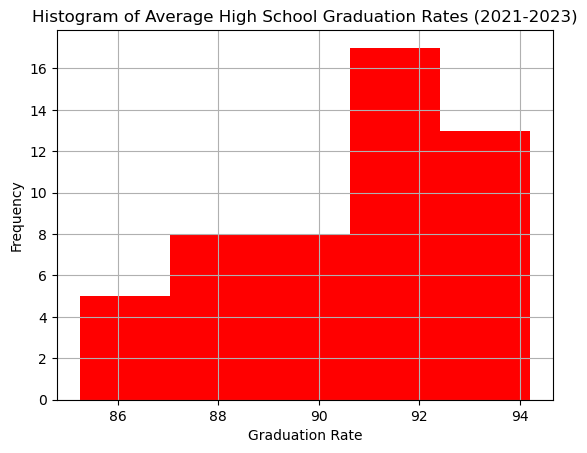

In [20]:
#Create a histogram to show the general trend of HS grad rates in the U.S
OD_factors_final_df['Average High School Graduation Rate (2021-2023)'].hist(bins=5, color = "red")
plt.title('Histogram of Average High School Graduation Rates (2021-2023)')
plt.xlabel('Graduation Rate')
plt.ylabel('Frequency')
#export graph as jpg
plt.savefig("HS_histogram.jpg")
plt.show()

The linear regression has a r-value correlation of -0.117.
The linear regression has a p-value of 0.412.


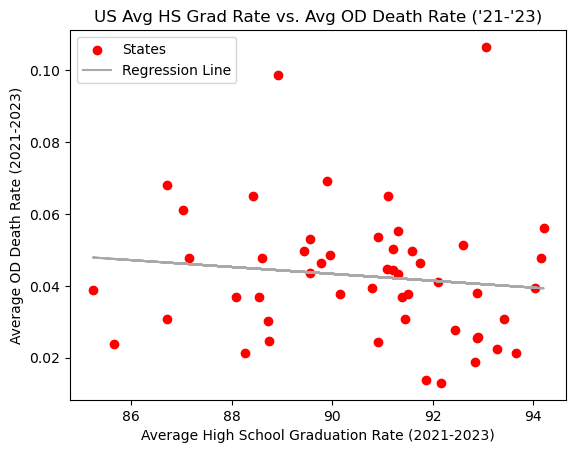

In [62]:
# Start Caluclations
# Q1: How does education rates (high school graduation) affect overdose rates by county across different regional areas in the US?
# graph: each state as a data point on a scatterplot comparing HS graduation rate to drug overdose rate, with a regression line) 

# Plot HS Grad Rates vs Drug Overdose Rates on Scatter Plot
HS_OD = linear_reg(OD_factors_final_df, "Average High School Graduation Rate (2021-2023)", "Average OD Death Rate (2021-2023)", "red")
plt.title("US Avg HS Grad Rate vs. Avg OD Death Rate ('21-'23")

#export graph as jpg
plt.savefig("HS_OD_scatterplot.jpg")

### Discussion of Average High School Graduation Rate and Average Drug Overdose Rate

Although extremely slight, the average death by drug overdose rate does decline as states achieve higher high school graduation rates. However, this does not mean that the decrease in drug overdose rate with an increase of high school graduation rate is statistically significant. 

Our null hypothesis for the contributing factor of High School Graduation Rates was that there would be no change in drug overdose rate with a fluctuation in high school graduation rate, and an alternative hypothesis that as high school graduation rates increased, drug overdose rates would decline significantly. However, with a p-value of .412, we must fail to reject the null hypothesis. There is not sufficient evidence to suggest that a decrease in drug overdose rate with an increase of high school graduation rate did not happen by chance. 

The r-squared value of this regression is -.117, which is quite low. This demonstrates that the two variables are weakly correlated, and that assessing high school graduation rates will not be a sufficient indicator of any given state’s drug overdose rate. 

Two visual outliers on the graph above are Washington DC, with a drug overdose rate of .1% and a high school graduation rate of 93%. The other is West Virginia, with a drug overdose rate of 0.9% and a high school graduation rate of 88%. This is interesting becuase they are geographically close to each other, though they do not share a border. When looking at just high school graduation rates and death by drug overdose rates, there is not another factor present that may connect these two states. 

Regardless of what the scatterplot and regression line appears to be in the graph, after considering the r-squared value and the p-value, we must fail to reject the Null Hypothesis: For adults 18 and older in the United States from the years 2021-2023, as average Education Rate increases, average Drug Overdose Rate does not change. 






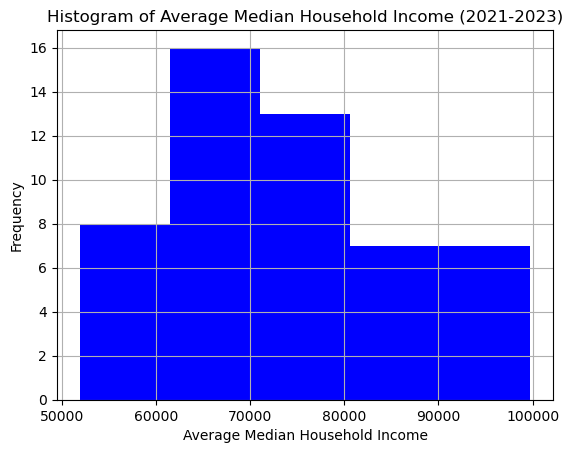

In [21]:
#Create a histogram to show the general trend of household income in the U.S
OD_factors_final_df['Average Median Household Income (2021-2023)'].hist(bins=5, color = "blue")
plt.title('Histogram of Average Median Household Income (2021-2023)')
plt.xlabel('Average Median Household Income')
plt.ylabel('Frequency')
#export graph as jpg
plt.savefig("income_histogram.jpg")
plt.show()

The linear regression has a r-value correlation of 0.01.
The linear regression has a p-value of 0.943.


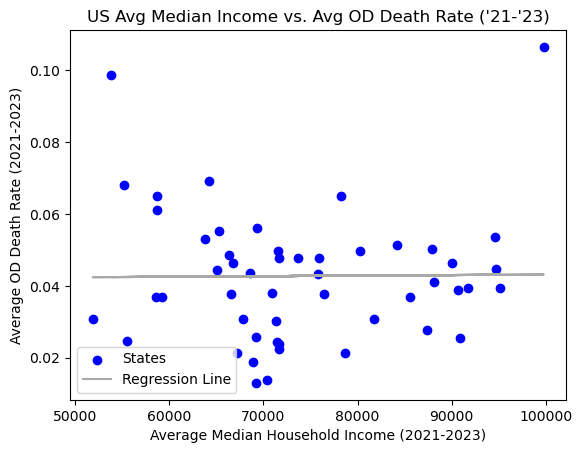

In [83]:
# Q2: Is there a link between socioeconomic status (household median income) and rate of overdoses? 
# graph: each state as a data point on a scatter plot comparing household mean income to drug overdose rate, with regression line

# Plot Median Household Income vs Drug Overdose Rates on Scatter Plot
linear_reg(OD_factors_final_df, "Average Median Household Income (2021-2023)", "Average OD Death Rate (2021-2023)", "blue")
plt.title("US Avg Median Income vs. Avg OD Death Rate ('21-'23)")

#export graph as jpg
plt.savefig("income_OD_scatterplot.jpg")

### Discussion of Average Median Household Income and Average Drug Overdose Rate

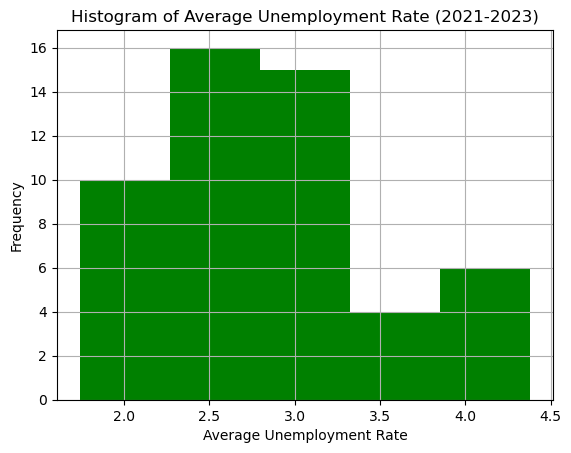

In [22]:
#Create a histogram to show the general trend of unemployment rates in the U.S
OD_factors_final_df['Average Unemployment Rate (2021-2023)'].hist(bins=5, color = "green")
plt.title('Histogram of Average Unemployment Rate (2021-2023)')
plt.xlabel('Average Unemployment Rate')
plt.ylabel('Frequency')
#export graph as jpg
plt.savefig("unemployment_histogram.jpg")
plt.show()

The linear regression has a r-value correlation of 0.093.
The linear regression has a p-value of 0.515.


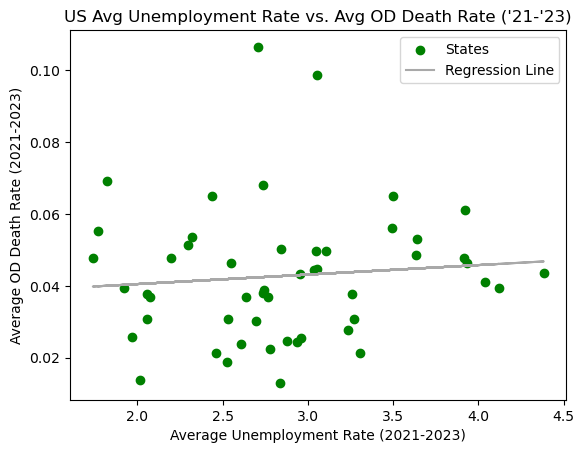

In [84]:
# Q3: Does unemployment rate affect rates of drug overdose by state? 
# graph: each state as a data point on a scatter plot comparing unemployment rate to drug overdose rate, with regression line

# Plot Unemployment Rate vs Drug Overdose Rates on Scatter Plot
linear_reg(OD_factors_final_df, "Average Unemployment Rate (2021-2023)", "Average OD Death Rate (2021-2023)", "green")
plt.title("US Avg Unemployment Rate vs. Avg OD Death Rate ('21-'23)")

#export graph as jpg
plt.savefig("unemployment_OD_scatterplot.jpg")

### Discussion of Average Enemployment Rate and Average Drug Overdose Rate

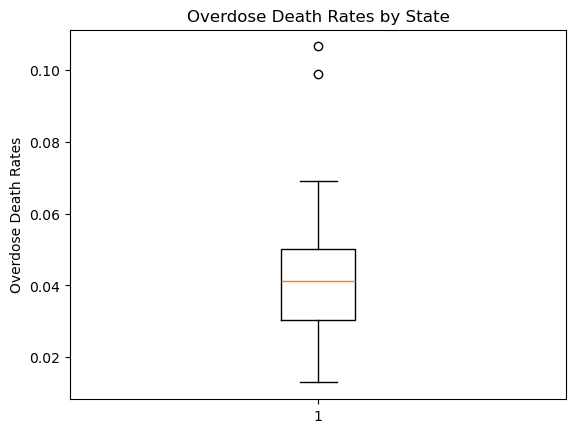

In [24]:
# Statistical Calculations: 
OD_rates = OD_factors_final_df["Average OD Death Rate (2021-2023)"]

# Create a Boxplot of all States Average Overdose Rate. 
fig1, ax1 = plt.subplots()
ax1.set_title("Overdose Death Rates by State")
ax1.set_ylabel('Overdose Death Rates')
ax1.boxplot(OD_rates)

#export graph as jpg
plt.savefig("OD_boxplot.jpg")
plt.show()



In [86]:
# Calculate Quartiles
quartiles = OD_rates.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of OD rates is: {lowerq}")
print(f"The upper quartile of OD rates is: {upperq}")
print(f"The interquartile range of OD rates is: {round(iqr, 4)}")
print(f"The the median of OD rates is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {round(lower_bound,4)} could be outliers.")
print(f"Values above {round(upper_bound, 4)} could be outliers.")

The lower quartile of OD rates is: 0.0304
The upper quartile of OD rates is: 0.05005
The interquartile range of OD rates is: 0.0196
The the median of OD rates is: 0.0411 
Values below 0.0009 could be outliers.
Values above 0.0795 could be outliers.


### Discussion of Outliers and IQR for Drug Overdose Rate and Contributing Factors

In [88]:
# Use Quartiles calculates above along with contributing factor (income, unemployment, grad rate) found to have strongest
# correlation to Overdose Rates to make 4 boxplots (side by side)


# Perform ANOVA test on boxplots to determine if there is a significant difference between the 4 quartiles


# Export graph as jpeg for use in presentation

In [89]:
# In markdown below, discuss ANOVA test and the quartiles created

Add Discusssion here. 

In [93]:
map_df = OD_factors_final_df.copy()
map_df["Longitude"] = -map_df["Longitude"]

# For Presentation, create map of all 50 states, using Drug Overdose Rate for the "size"
overdose_rates_map = map_df.hvplot.points(
    "Longitude", 
    "Latitude", 
    geo = True, 
    tiles = "OSM", 
    frame_width = 750, 
    frame_height = 500, 
    size = "Average OD Death Rate (2021-2023)", 
    scale = 75, 
    alpha = .60,
    color = "State name", 
)

overdose_rates_map

# Export graph as jpeg for use in presentation
# export graph as jpg
hvplot.save(overdose_rates_map, 'OD_map.html')

## Conclusions